<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Maksim Dimitrijev | July 04, 2019<br>
        Özlem Salehi | July 14, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solutions for </font>Grover's Search Implementation</h2>

<a id="task1"></a>
<h3>Task 1</h3>

Implement the inversion operation, including the optional step of applying ZXZX to the qubit 0.

In the implementation the ancilla qubit will be qubit 2, while qubits for control are 0 and 1. As a result you should obtain the following values in the top-left $4 \times 4$ entries:

$\mymatrix{cccc}{-0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & -0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & -0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & -0.5}$.

<h3>Solution</h3>

In [1]:
def inversion(circuit,quantum_reg):
    
    
    #step 1
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])
    
    #step 2
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])

    #step 3
    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[2])

    #step 4
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])
    
    #step 5
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])

    #step 6
    circuit.x(quantum_reg[2])




Below you can check the matrix of your inversion operator and how the circuit looks like. We are interested in top-left $4 \times 4$ part of the matrix, the remaining parts are because we used ancilla qubit.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)
creg1 = ClassicalRegister(3)

mycircuit1 = QuantumCircuit(qreg1,creg1)

#set ancilla qubit
mycircuit1.x(qreg1[2])
mycircuit1.h(qreg1[2])
    
inversion(mycircuit1,qreg1)

#set ancilla qubit back
mycircuit1.h(qreg1[2])
mycircuit1.x(qreg1[2])


job = execute(mycircuit1,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(mycircuit1,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    
mycircuit1.draw(output='mpl')

 -0.5  0.5  0.5  0.5  0.0  0.0  0.0  0.0
  0.5 -0.5  0.5  0.5  0.0  0.0  0.0  0.0
  0.5  0.5 -0.5  0.5  0.0  0.0  0.0  0.0
  0.5  0.5  0.5 -0.5  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


<Figure size 752.5x526.75 with 1 Axes>

<a id="task2"></a>
<h3>Task 2 (Optional, challenging)</h3>

Implement the inversion operation for $n=3$ ($N=8$). This time you will need 5 qubits - 3 for the operation, 1 for ancilla, and one more qubit to ensure the operation of 3 qubits controlling the other qubit.

In the implementation the ancilla qubit will be qubit 4, while qubits for control are 0, 1 and 2; qubit 3 is used to ensure this multiple control operation. As a result you should obtain the following values in the top-left $8 \times 8$ entries:

$\mymatrix{cccccccc}{-0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75}$.

<h3>Solution</h3>

In [5]:
def big_inversion(circuit,quantum_reg):
   

    for i in range(3):
        circuit.h(quantum_reg[i])
        circuit.x(quantum_reg[i])

    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[3])
    circuit.ccx(quantum_reg[2],quantum_reg[3],quantum_reg[4])
    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[3])

    for i in range(3):
        circuit.x(quantum_reg[i])
        circuit.h(quantum_reg[i])

    
    circuit.x(quantum_reg[4])
    
   

Below you can check the matrix of your inversion operator. We are interested in the top-left $8 \times 8$ part of the matrix, the remaining parts are because of additional qubits.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

big_qreg2 =  QuantumRegister(5)
big_creg2 = ClassicalRegister(5)

big_mycircuit2 = QuantumCircuit(big_qreg2,big_creg2)

#set ancilla
big_mycircuit2.x(big_qreg2[4])
big_mycircuit2.h(big_qreg2[4])
    
big_inversion(big_mycircuit2,big_qreg2)

#set ancilla back
big_mycircuit2.h(big_qreg2[4])
big_mycircuit2.x(big_qreg2[4])

job = execute(big_mycircuit2,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(big_mycircuit2,decimals=3)
for i in range(8):
    s=""
    for j in range(8):
        val = str(u[i][j].real)
        while(len(val)<6): val  = " "+val
        s = s + val
    print(s)

<a id="task3"></a>
<h3>Task 3: Testing Grover's search</h3>

Now we are ready to test our operations and run Grover's search. Suppose that there are 4 elements in the list and try to find the marked element.

First run the following cell to load operator $U_f$. You can access it via:
   f(circuit,qreg)
    
Which state do you observe the most? (Note that the last qubit is the ancilla)

In [4]:
%run f.py

<h3>Solution</h3>

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg = QuantumRegister(3)
creg = ClassicalRegister(3)

mycircuit = QuantumCircuit(qreg,creg)

#Grover


#initial step - equal superposition
for i in range(2):
    mycircuit.h(qreg[i])

#set ancilla
mycircuit.x(qreg[2])
mycircuit.h(qreg[2])

mycircuit.barrier()

#change the number of iterations
iterations=1

#Grover's iterations.
for i in range(iterations):
    #query
    f(mycircuit,qreg)
    mycircuit.barrier()
    #inversion
    inversion(mycircuit,qreg)
    mycircuit.barrier()
    
    
#set ancilla back
mycircuit.h(qreg[2])
mycircuit.x(qreg[2]) 
    
mycircuit.measure(qreg,creg)

job = execute(mycircuit,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(mycircuit)

# print the reverse of the outcome
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts[outcome],"times")

mycircuit.draw(output='mpl')

<a id="task4"></a>
<h3>Task 4: 8 element case (optional)</h3>

We will use 2 ancilla qubits. We have $n=3$, $N=8$, and use 5 total qubits. This means that the parts of operation matrices that we are interested in are the top-left $8 \times 8$ entries.

You can access the operator $U_{f_8}$ by $f_8(circuit,qreg)$
    
Which state do you observe the most? (Note that the last two qubits are ancilla)

<h3>Solution</h3>

11000 is observed 9998 times
10000 is observed 2 times


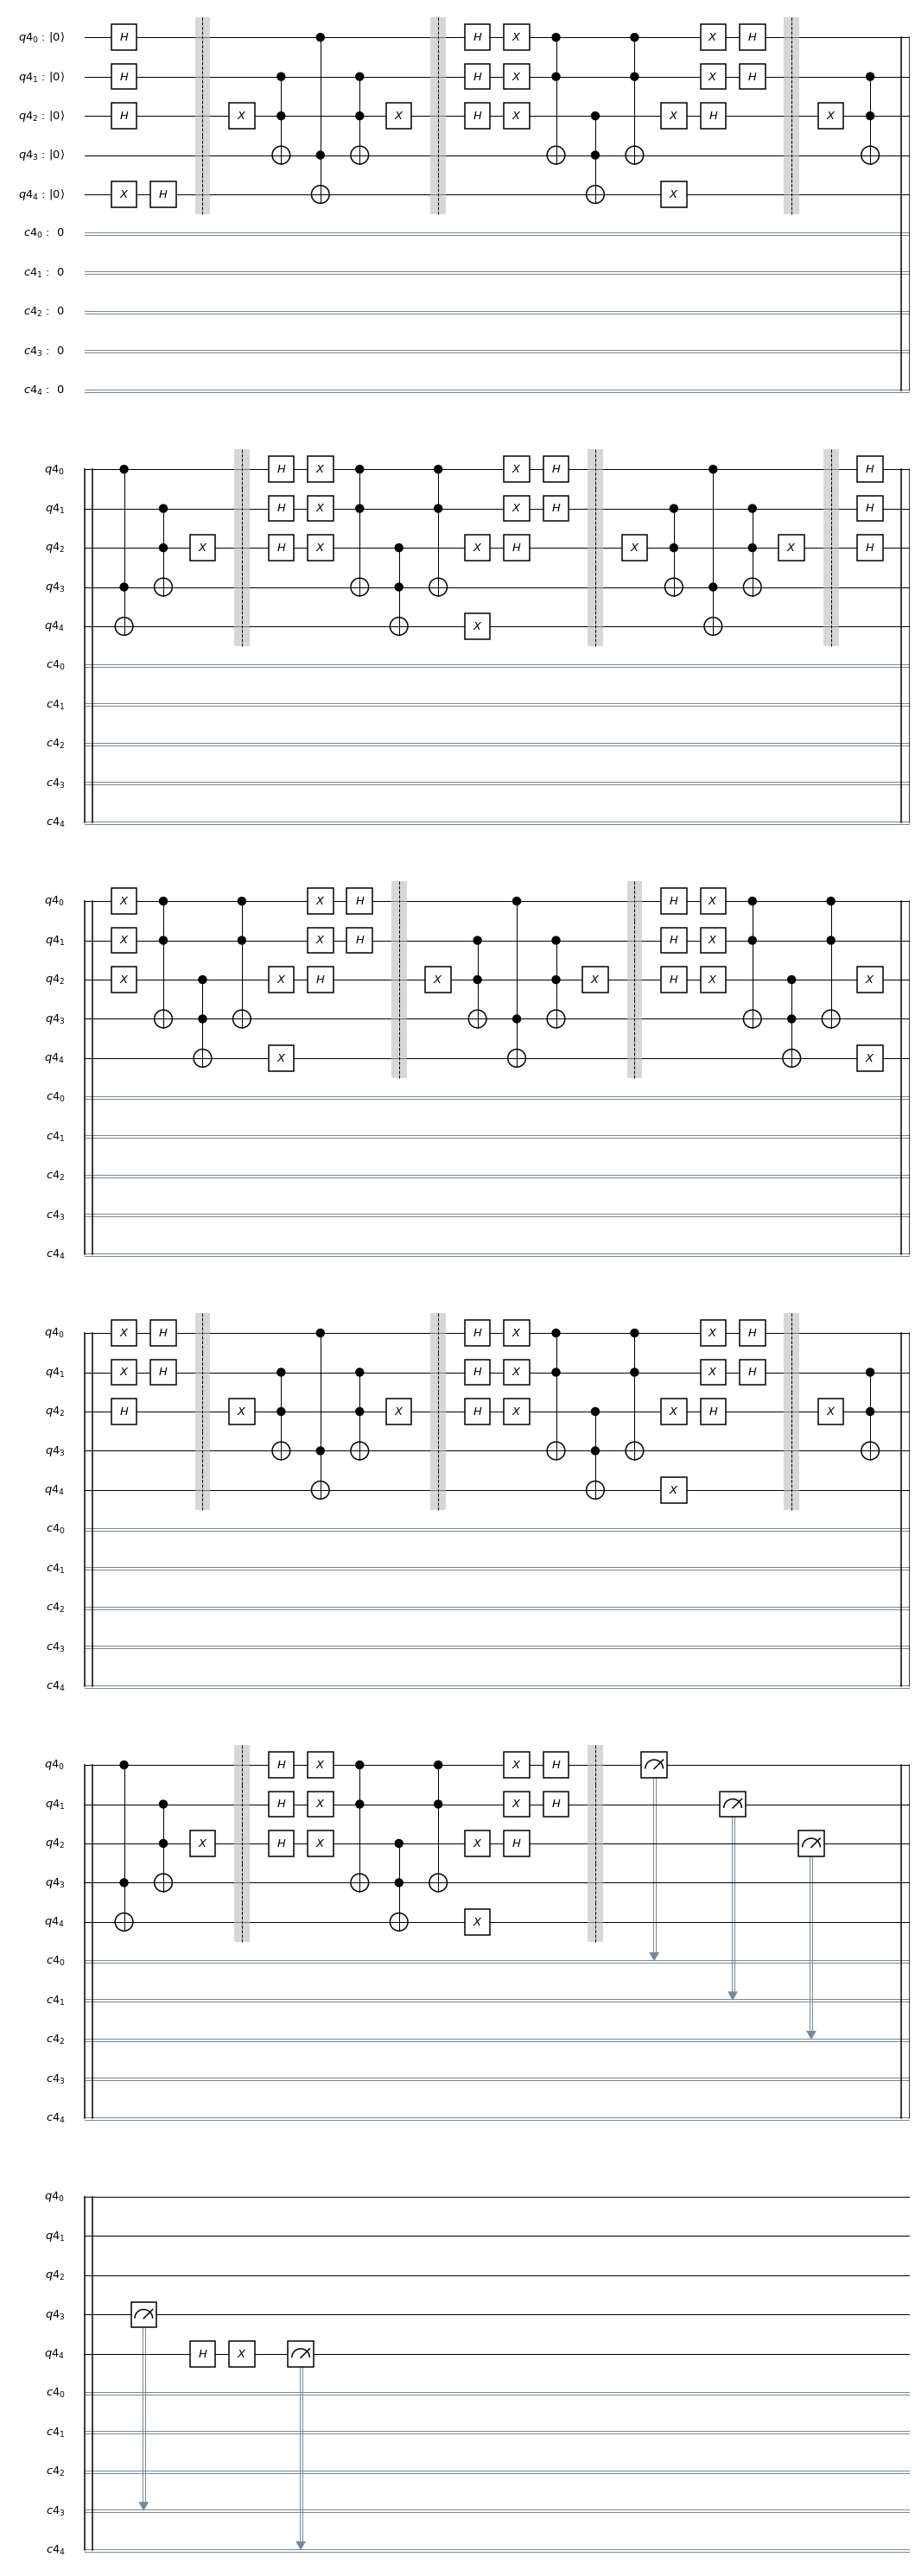

In [8]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg8 =  QuantumRegister(5)
creg8 = ClassicalRegister(5)

mycircuit8 = QuantumCircuit(qreg8,creg8)

#set ancilla
mycircuit8.x(qreg8[4])
mycircuit8.h(qreg8[4])

#Grover
for i in range(3):
    mycircuit8.h(qreg8[i])

mycircuit8.barrier()

#Try 1,2,6,12 iterations of Grover
for i in range(6):
    f_8(mycircuit8,qreg8)
    mycircuit8.barrier()
    big_inversion(mycircuit8,qreg8)
    mycircuit8.barrier()

#set ancilla back

mycircuit8.h(qreg8[4])
mycircuit8.x(qreg8[4])

mycircuit8.measure(qreg8,creg8)

job = execute(mycircuit8,Aer.get_backend('qasm_simulator'),shots=10000)
counts8 = job.result().get_counts(mycircuit8)
# print the reverse of the outcome
for outcome in counts8:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome,"is observed",counts8[outcome],"times")

mycircuit8.draw(output='mpl')